## **Data Cleaning and EDA**

- Are missing values imputed/handled appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Marvel

#### Data Cleaning

In [30]:
marvel =pd.read_csv('marvel.csv')

In [31]:
marvel.head()

,id,title,content,score,num_comments,author,created_utc,upvote_ratio,subreddit_flair,submission_datetime,post_type,entity_recognition,text_sentiment,external_links_count
0,yktbuk,We need more scenes like this,NaN,46802,1188,steikul,1.667453e+09,0.91,Film/Television,1.667453e+09,False,[],0.4173,0
1,8jok7z,Fun in the sun with Dr. Strange,NaN,42432,198,Scaulbylausis,1.526414e+09,0.95,Fan Made,1.526414e+09,False,['Strange'],0.3612,0
2,87i3qf,Neat,NaN,40199,216,Isai76,1.522155e+09,0.92,Other,1.522155e+09,False,[],0.4588,0
3,bjkx77,My Son's Graduation Mortarboard,NaN,33406,239,TehErk,1.556737e+09,0.91,Fan Made,1.556737e+09,False,[],0.0000,0
4,8m78k8,Chris Evans being great as usual,NaN,33397,596,Unknown,1.527303e+09,0.93,NaN,1.527303e+09,False,['Chris Evans'],0.6249,0


In [32]:
# Display basic information about the dataset
print(marvel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   title                 1000 non-null   object 
 2   content               11 non-null     object 
 3   score                 1000 non-null   int64  
 4   num_comments          1000 non-null   int64  
 5   author                1000 non-null   object 
 6   created_utc           1000 non-null   float64
 7   upvote_ratio          1000 non-null   float64
 8   subreddit_flair       793 non-null    object 
 9   submission_datetime   1000 non-null   float64
 10  post_type             1000 non-null   bool   
 11  entity_recognition    1000 non-null   object 
 12  text_sentiment        1000 non-null   float64
 13  external_links_count  1000 non-null   int64  
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 102.7+ KB
None


In [33]:
# Summary statistics
print(marvel.describe())

              score  num_comments   created_utc  upvote_ratio  \
count   1000.000000   1000.000000  1.000000e+03   1000.000000   
mean    8435.327000    270.226000  1.577427e+09      0.952250   
std     4092.074822    290.871066  5.551783e+07      0.035129   
min     4746.000000     27.000000  1.428416e+09      0.610000   
25%     6100.250000    108.750000  1.541697e+09      0.940000   
50%     7138.000000    186.000000  1.569697e+09      0.960000   
75%     9201.500000    323.000000  1.619603e+09      0.980000   
max    46802.000000   4083.000000  1.694792e+09      0.990000   

       submission_datetime  text_sentiment  external_links_count  
count         1.000000e+03     1000.000000           1000.000000  
mean          1.577427e+09        0.139692              0.001000  
std           5.551783e+07        0.367846              0.031623  
min           1.428416e+09       -0.928800              0.000000  
25%           1.541697e+09        0.000000              0.000000  
50%         

In [34]:
marvel.describe()

,score,num_comments,created_utc,upvote_ratio,submission_datetime,text_sentiment,external_links_count
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,8435.327000,270.226000,1.577427e+09,0.952250,1.577427e+09,0.139692,0.001000
std,4092.074822,290.871066,5.551783e+07,0.035129,5.551783e+07,0.367846,0.031623
min,4746.000000,27.000000,1.428416e+09,0.610000,1.428416e+09,-0.928800,0.000000
25%,6100.250000,108.750000,1.541697e+09,0.940000,1.541697e+09,0.000000,0.000000
50%,7138.000000,186.000000,1.569697e+09,0.960000,1.569697e+09,0.000000,0.000000
75%,9201.500000,323.000000,1.619603e+09,0.980000,1.619603e+09,0.438900,0.000000
max,46802.000000,4083.000000,1.694792e+09,0.990000,1.694792e+09,0.983700,1.000000


In [35]:
# Check for missing values
print(marvel.isnull().sum())

id                        0
title                     0
content                 989
score                     0
num_comments              0
author                    0
created_utc               0
upvote_ratio              0
subreddit_flair         207
submission_datetime       0
post_type                 0
entity_recognition        0
text_sentiment            0
external_links_count      0
dtype: int64


In [36]:
# Fill missing subreddit flair with a placeholder value
marvel['subreddit_flair'].fillna('No flair', inplace=True)

In [37]:
# Check for missing values
print(marvel.isnull().sum())

id                        0
title                     0
content                 989
score                     0
num_comments              0
author                    0
created_utc               0
upvote_ratio              0
subreddit_flair           0
submission_datetime       0
post_type                 0
entity_recognition        0
text_sentiment            0
external_links_count      0
dtype: int64


In [38]:
marvel.head()

,id,title,content,score,num_comments,author,created_utc,upvote_ratio,subreddit_flair,submission_datetime,post_type,entity_recognition,text_sentiment,external_links_count
0,yktbuk,We need more scenes like this,NaN,46802,1188,steikul,1.667453e+09,0.91,Film/Television,1.667453e+09,False,[],0.4173,0
1,8jok7z,Fun in the sun with Dr. Strange,NaN,42432,198,Scaulbylausis,1.526414e+09,0.95,Fan Made,1.526414e+09,False,['Strange'],0.3612,0
2,87i3qf,Neat,NaN,40199,216,Isai76,1.522155e+09,0.92,Other,1.522155e+09,False,[],0.4588,0
3,bjkx77,My Son's Graduation Mortarboard,NaN,33406,239,TehErk,1.556737e+09,0.91,Fan Made,1.556737e+09,False,[],0.0000,0
4,8m78k8,Chris Evans being great as usual,NaN,33397,596,Unknown,1.527303e+09,0.93,No flair,1.527303e+09,False,['Chris Evans'],0.6249,0


## Harry Potter

#### Data cleaning

In [39]:
harrypotter =pd.read_csv('harrypotter.csv')

In [40]:
harrypotter.head()

,id,title,content,score,num_comments,author,created_utc,upvote_ratio,subreddit_flair,submission_datetime,post_type,entity_recognition,text_sentiment,external_links_count
0,rtqob0,How to make a grown man cry: Hagrid Edition.,NaN,80477,871,vpsj,1.641066e+09,0.94,Discussion,1.641066e+09,False,[],-0.4767,0
1,ll4kki,Warwick Davis and his various roles in Harry P...,NaN,79975,1012,200020124,1.613485e+09,0.96,Behind the Scenes,1.613485e+09,False,"['Warwick Davis', 'Harry Potter']",0.0000,0
2,ik1goe,After waiting nearly 2 months for my missing p...,NaN,76676,1186,blackmachine312,1.598892e+09,0.91,Merchandise,1.598892e+09,False,['nearly 2 months'],-0.4184,0
3,sfgxxy,Another dungbomb from my pensive,NaN,67755,310,Voldyneedsnose,1.643458e+09,0.88,Dungbomb,1.643458e+09,False,[],0.0772,0
4,dfj3pq,I made a model of Azkaban,NaN,62158,905,BlandDandelion,1.570637e+09,0.96,Fanworks,1.570637e+09,False,['Azkaban'],0.0000,0


In [41]:
# Display basic information about the dataset
print(harrypotter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   title                 1000 non-null   object 
 2   content               36 non-null     object 
 3   score                 1000 non-null   int64  
 4   num_comments          1000 non-null   int64  
 5   author                1000 non-null   object 
 6   created_utc           1000 non-null   float64
 7   upvote_ratio          1000 non-null   float64
 8   subreddit_flair       911 non-null    object 
 9   submission_datetime   1000 non-null   float64
 10  post_type             1000 non-null   bool   
 11  entity_recognition    1000 non-null   object 
 12  text_sentiment        1000 non-null   float64
 13  external_links_count  1000 non-null   int64  
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 102.7+ KB
None


In [42]:
# Summary statistics
print(harrypotter.describe())

              score  num_comments   created_utc  upvote_ratio  \
count   1000.000000    1000.00000  1.000000e+03   1000.000000   
mean   18927.532000     364.03900  1.586812e+09      0.933480   
std     8851.831634     486.68708  4.780430e+07      0.043211   
min    10846.000000      35.00000  1.414688e+09      0.630000   
25%    13216.250000     170.75000  1.546071e+09      0.920000   
50%    16089.500000     265.00000  1.592942e+09      0.940000   
75%    21607.000000     419.50000  1.617063e+09      0.960000   
max    80477.000000   10395.00000  1.696860e+09      0.990000   

       submission_datetime  text_sentiment  external_links_count  
count         1.000000e+03     1000.000000           1000.000000  
mean          1.586812e+09        0.164477              0.007000  
std           4.780430e+07        0.373569              0.104699  
min           1.414688e+09       -0.989300              0.000000  
25%           1.546071e+09        0.000000              0.000000  
50%         

In [43]:
harrypotter.describe()

,score,num_comments,created_utc,upvote_ratio,submission_datetime,text_sentiment,external_links_count
count,1000.000000,1000.00000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,18927.532000,364.03900,1.586812e+09,0.933480,1.586812e+09,0.164477,0.007000
std,8851.831634,486.68708,4.780430e+07,0.043211,4.780430e+07,0.373569,0.104699
min,10846.000000,35.00000,1.414688e+09,0.630000,1.414688e+09,-0.989300,0.000000
25%,13216.250000,170.75000,1.546071e+09,0.920000,1.546071e+09,0.000000,0.000000
50%,16089.500000,265.00000,1.592942e+09,0.940000,1.592942e+09,0.000000,0.000000
75%,21607.000000,419.50000,1.617063e+09,0.960000,1.617063e+09,0.458800,0.000000
max,80477.000000,10395.00000,1.696860e+09,0.990000,1.696860e+09,0.992900,2.000000


In [44]:
# Check for missing values
print(harrypotter.isnull().sum())

id                        0
title                     0
content                 964
score                     0
num_comments              0
author                    0
created_utc               0
upvote_ratio              0
subreddit_flair          89
submission_datetime       0
post_type                 0
entity_recognition        0
text_sentiment            0
external_links_count      0
dtype: int64


In [45]:
# Fill missing subreddit flair with a placeholder value
harrypotter['subreddit_flair'].fillna('No flair', inplace=True)

In [47]:
# Check for missing values
print(harrypotter.isnull().sum())

id                        0
title                     0
content                 964
score                     0
num_comments              0
author                    0
created_utc               0
upvote_ratio              0
subreddit_flair           0
submission_datetime       0
post_type                 0
entity_recognition        0
text_sentiment            0
external_links_count      0
dtype: int64


In [46]:
harrypotter.head()

,id,title,content,score,num_comments,author,created_utc,upvote_ratio,subreddit_flair,submission_datetime,post_type,entity_recognition,text_sentiment,external_links_count
0,rtqob0,How to make a grown man cry: Hagrid Edition.,NaN,80477,871,vpsj,1.641066e+09,0.94,Discussion,1.641066e+09,False,[],-0.4767,0
1,ll4kki,Warwick Davis and his various roles in Harry P...,NaN,79975,1012,200020124,1.613485e+09,0.96,Behind the Scenes,1.613485e+09,False,"['Warwick Davis', 'Harry Potter']",0.0000,0
2,ik1goe,After waiting nearly 2 months for my missing p...,NaN,76676,1186,blackmachine312,1.598892e+09,0.91,Merchandise,1.598892e+09,False,['nearly 2 months'],-0.4184,0
3,sfgxxy,Another dungbomb from my pensive,NaN,67755,310,Voldyneedsnose,1.643458e+09,0.88,Dungbomb,1.643458e+09,False,[],0.0772,0
4,dfj3pq,I made a model of Azkaban,NaN,62158,905,BlandDandelion,1.570637e+09,0.96,Fanworks,1.570637e+09,False,['Azkaban'],0.0000,0


## EDA Plots

In [48]:
marvel.columns

Index(['id', 'title', 'content', 'score', 'num_comments', 'author',
       'created_utc', 'upvote_ratio', 'subreddit_flair', 'submission_datetime',
       'post_type', 'entity_recognition', 'text_sentiment',
       'external_links_count'],
      dtype='object')

In [198]:
harrypotter.columns

Index(['id', 'title', 'content', 'score', 'num_comments', 'author',
       'created_utc', 'upvote_ratio', 'subreddit_flair', 'submission_datetime',
       'post_type', 'entity_recognition', 'text_sentiment',
       'external_links_count'],
      dtype='object')

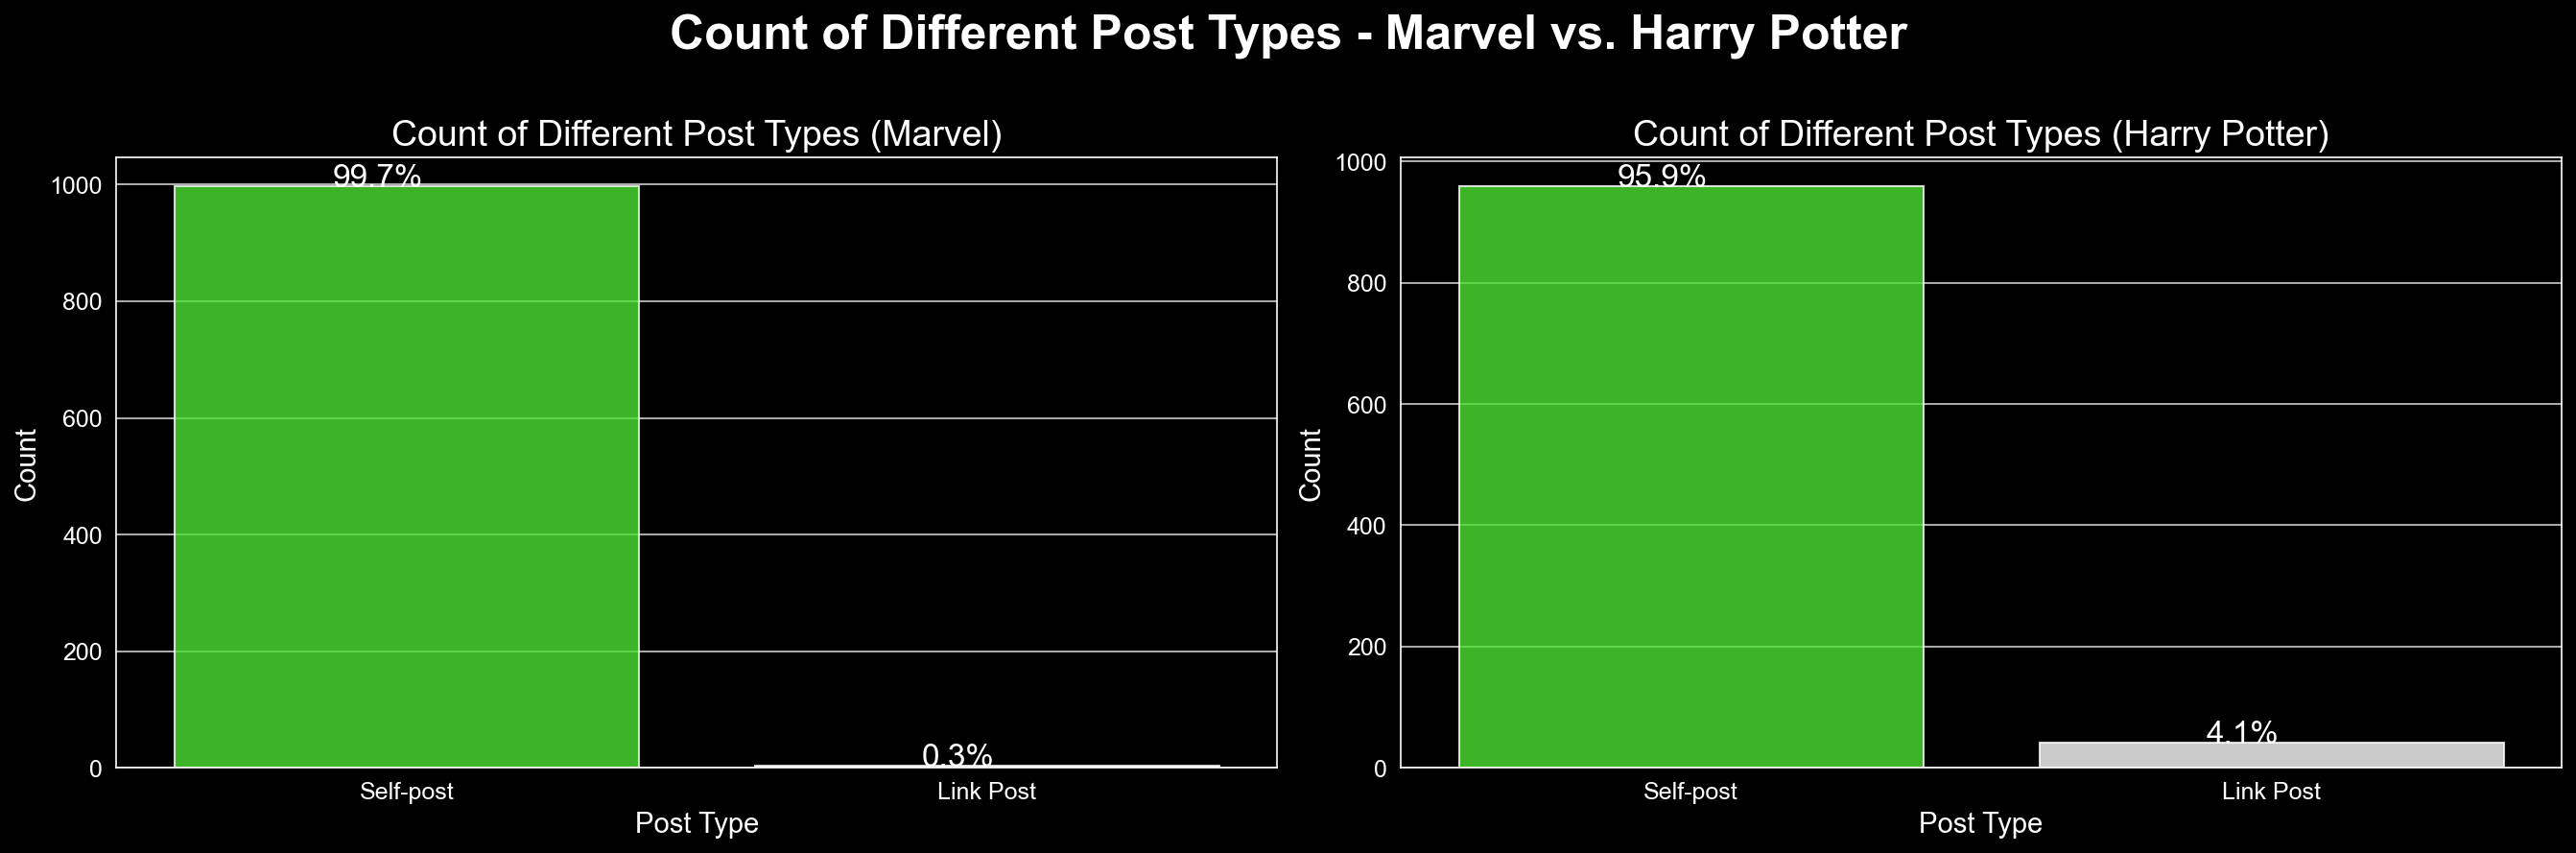

In [194]:
# Set the style
sns.set_style("whitegrid")

# Set up subplots with a higher DPI and a black background
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=150, facecolor='black')
fig.suptitle('Count of Different Post Types - Marvel vs. Harry Potter', fontsize=24, fontweight='bold', color='white')

# Define neon white and neon green colors with transparency
neon_white = "#FFFFFF80" 
neon_green = "#39FF1480"

# Count of Different Post Types for Marvel
sns.countplot(data=marvel, x='post_type', ax=axes[0], palette=[neon_green, neon_white], alpha=0.8)
axes[0].set_title('Count of Different Post Types (Marvel)', fontsize=18, color='white')
axes[0].set_xlabel('Post Type', color='white', fontsize=14)  # Increase font size
axes[0].set_ylabel('Count', color='white', fontsize=14)  # Increase font size
axes[0].set_xticklabels(["Self-post", "Link Post"], fontsize=12, color='white')

# Set the color of x and y axis labels and ticks to white
axes[0].tick_params(axis='x', colors='white', labelsize=12)  # Increase tick label font size
axes[0].tick_params(axis='y', colors='white', labelsize=12)  # Increase tick label font size
axes[0].xaxis.label.set_color('white')
axes[0].yaxis.label.set_color('white')

# Calculate and add percentages on the bars (Marvel)
total_marvel = len(marvel)
for p in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_marvel)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    axes[0].annotate(percentage, (x, y), fontsize=16, ha='center', color='white')

# Count of Different Post Types for Harry Potter
sns.countplot(data=harrypotter, x='post_type', ax=axes[1], palette=[neon_green, neon_white], alpha=0.8)
axes[1].set_title('Count of Different Post Types (Harry Potter)', fontsize=18, color='white')
axes[1].set_xlabel('Post Type', color='white', fontsize=14)
axes[1].set_ylabel('Count', color='white', fontsize=14) 
axes[1].set_xticklabels(["Self-post", "Link Post"], fontsize=12, color='white')

# Set the color of x and y axis labels and ticks to white
axes[1].tick_params(axis='x', colors='white', labelsize=12) 
axes[1].tick_params(axis='y', colors='white', labelsize=12)
axes[1].xaxis.label.set_color('white')
axes[1].yaxis.label.set_color('white')

# Calculate and add percentages on the bars (Harry Potter)
total_harrypotter = len(harrypotter)
for p in axes[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_harrypotter)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    axes[1].annotate(percentage, (x, y), fontsize=16, ha='center', color='white')
    
    
# Change background grid to black and lines to white
axes[0].set_facecolor('black')
axes[1].set_facecolor('black')
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


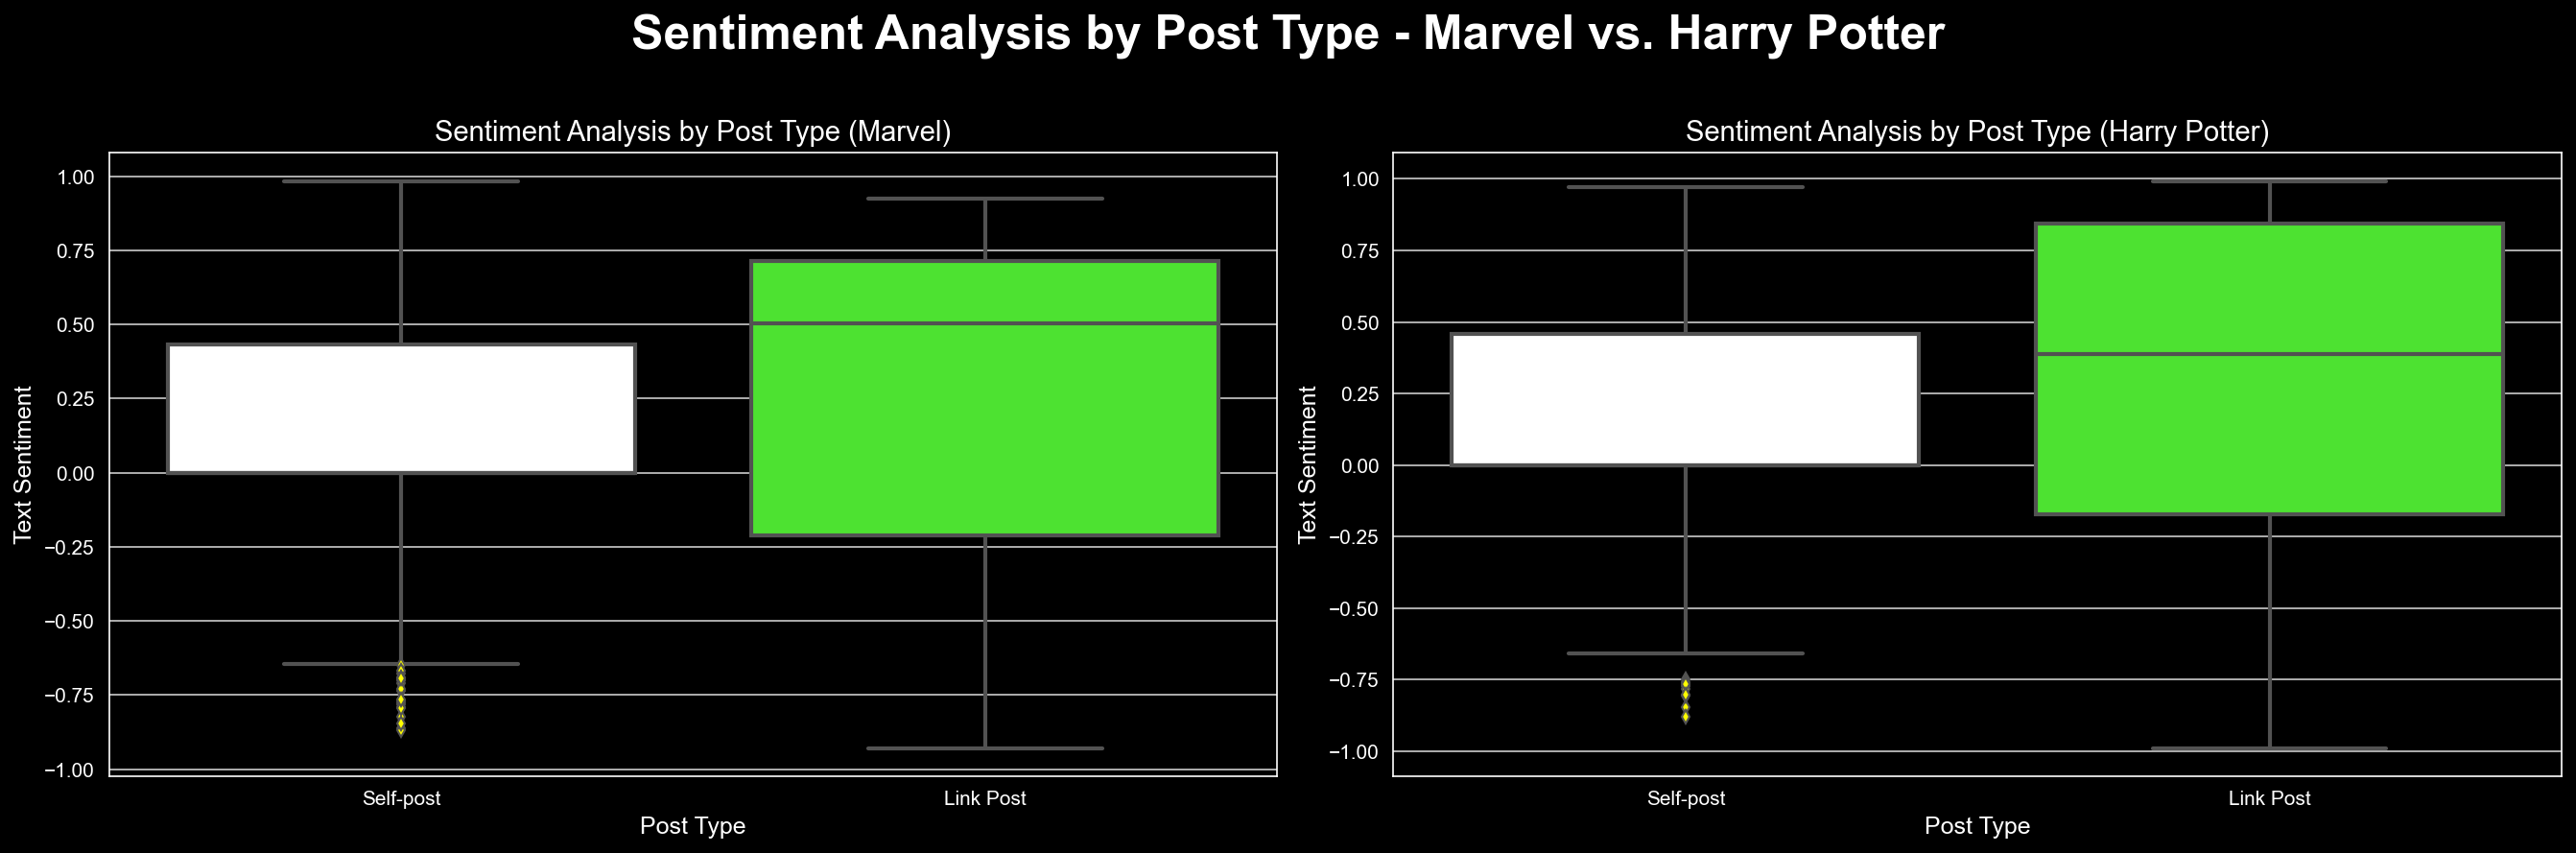

In [190]:
# Define neon white and neon green colors with transparency
neon_white = "#FFFFFF80"
neon_green = "#39FF1480"

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=150, facecolor='black')
fig.suptitle('Sentiment Analysis by Post Type - Marvel vs. Harry Potter', fontsize=24, fontweight='bold', color='white')

# Sentiment Analysis for Marvel
sns.boxplot(data=marvel, x='post_type', y='text_sentiment', ax=axes[0], palette=[neon_white, neon_green], linewidth=2, flierprops=dict(markerfacecolor='yellow', markersize=5))
axes[0].set_title('Sentiment Analysis by Post Type (Marvel)', fontsize=14, color='white')
axes[0].set_xlabel('Post Type', fontsize=12, color='white')
axes[0].set_ylabel('Text Sentiment', fontsize=12, color='white')
axes[0].set_xticklabels(["Self-post", "Link Post"], color='white')
axes[0].tick_params(axis='both', colors='white')  # Make ticks white

# Sentiment Analysis for Harry Potter
sns.boxplot(data=harrypotter, x='post_type', y='text_sentiment', ax=axes[1], palette=[neon_white, neon_green], linewidth=2, flierprops=dict(markerfacecolor='yellow', markersize=5))
axes[1].set_title('Sentiment Analysis by Post Type (Harry Potter)', fontsize=14, color='white')
axes[1].set_xlabel('Post Type', fontsize=12, color='white')
axes[1].set_ylabel('Text Sentiment', fontsize=12, color='white')
axes[1].set_xticklabels(["Self-post", "Link Post"], color='white')
axes[1].tick_params(axis='both', colors='white')  # Make ticks white

# Change background grid to black and lines to white
axes[0].set_facecolor('black')
axes[1].set_facecolor('black')
for spine in axes[0].spines.values():
    spine.set_edgecolor('white')
for spine in axes[1].spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


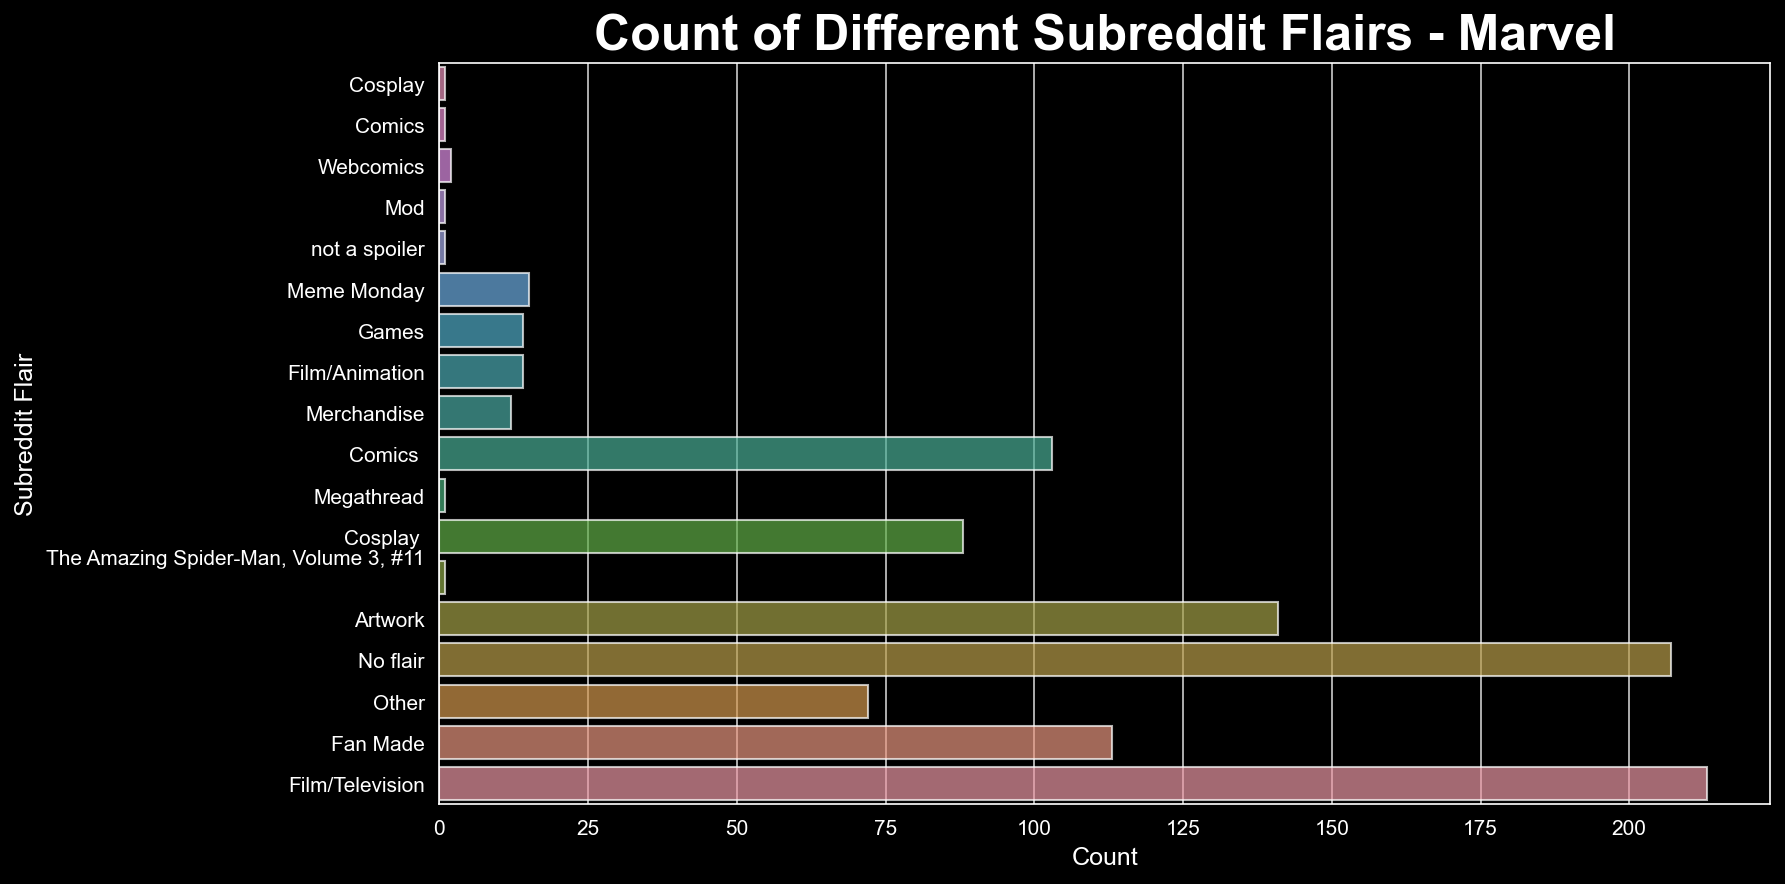

In [162]:
# Set a custom color palette with neon colors
neon_palette = ['#39FF14', '#F433FF', '#00E7B0', '#FF00AA', '#00FBFF']

# Create a horizontal bar plot for Marvel
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), dpi=150, facecolor='black')
plt.title('Count of Different Subreddit Flairs - Marvel', fontsize=24, fontweight='bold', color='white')

# Set the color palette and make the bars transparent
sns.set_palette(sns.color_palette(neon_palette))
sns.countplot(data=marvel, y='subreddit_flair', alpha=0.7)

plt.xlabel('Count', fontsize=12, color='white')
plt.ylabel('Subreddit Flair', fontsize=12, color='white')
plt.gca().invert_yaxis() 

# Set the color of x and y axis labels to white
plt.xticks(color='white')
plt.yticks(color='white')
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

# Change background grid to black and lines to white
axes.set_facecolor('black')
for spine in axes.spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout()
plt.show()

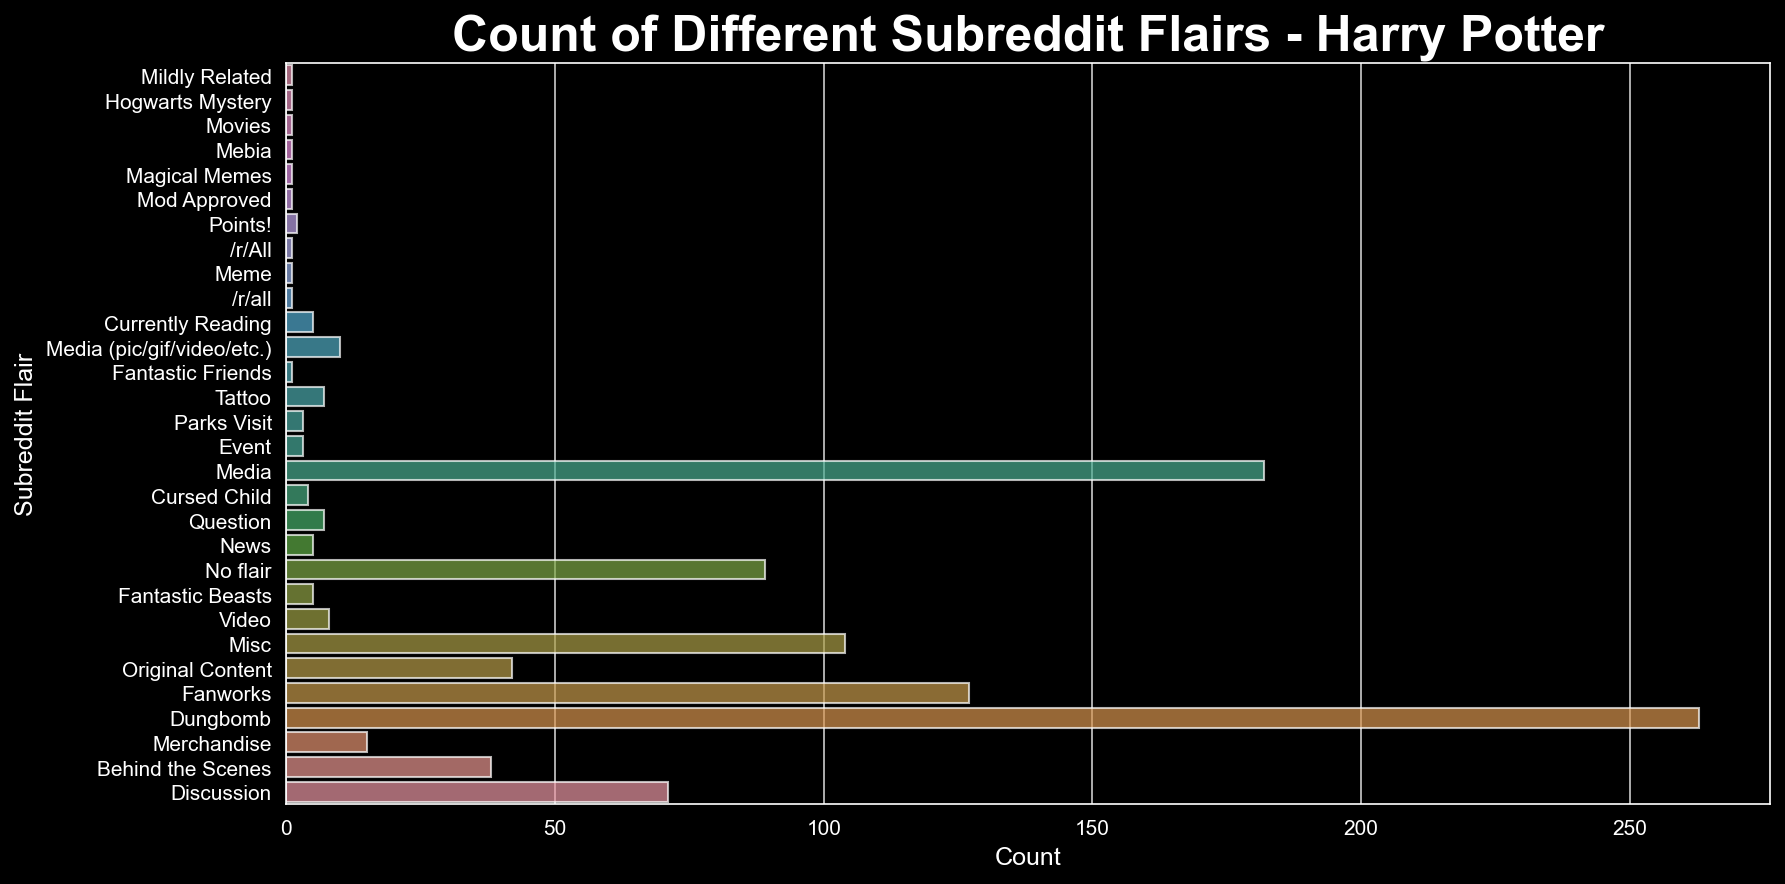

In [163]:
# Create a horizontal bar plot for Harry Potter
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), dpi=150, facecolor='black')
plt.title('Count of Different Subreddit Flairs - Harry Potter', fontsize=24, fontweight='bold', color='white')

# Set the color palette and make the bars transparent
sns.set_palette(sns.color_palette(neon_palette))
sns.countplot(data=harrypotter, y='subreddit_flair', alpha=0.7)

plt.xlabel('Count', fontsize=12, color='white')
plt.ylabel('Subreddit Flair', fontsize=12, color='white')
plt.gca().invert_yaxis() 

# Set the color of x and y axis labels to white
plt.xticks(color='white')
plt.yticks(color='white')
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

# Change background grid to black and lines to white
axes.set_facecolor('black')
for spine in axes.spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout()
plt.show()

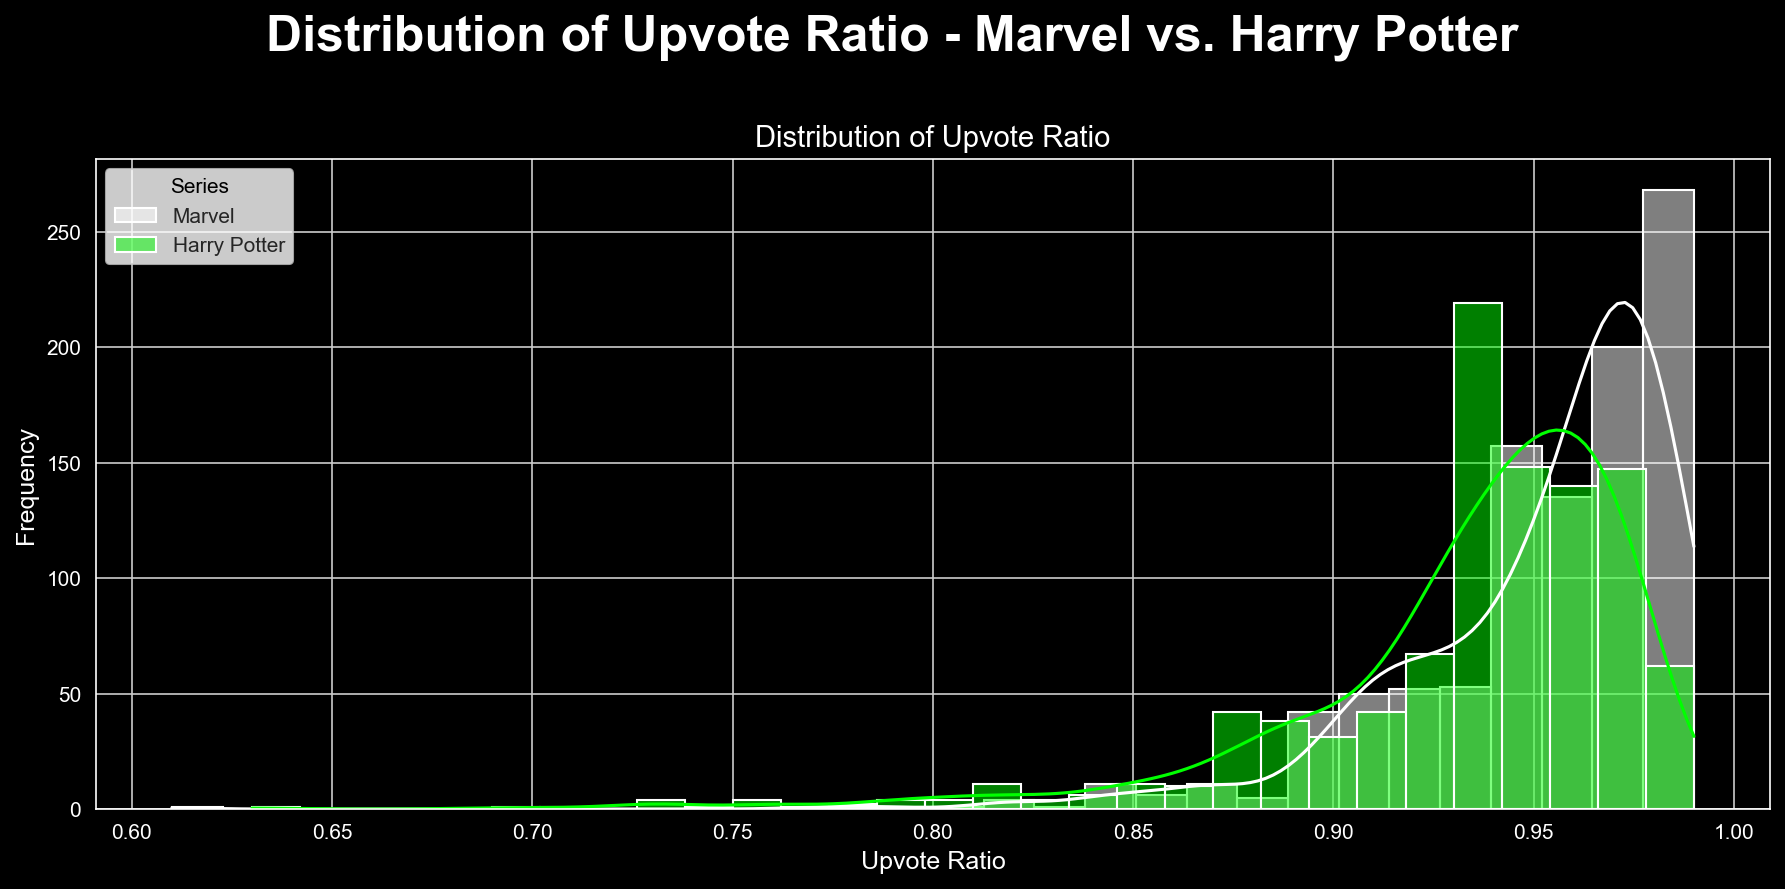

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), dpi=150, facecolor='black')
fig.suptitle('Distribution of Upvote Ratio - Marvel vs. Harry Potter', fontsize=24, fontweight='bold', color='white')

# Distribution of Upvote Ratio for Marvel
sns.histplot(data=marvel, x='upvote_ratio', bins=30, kde=True, color='white', ax=axes, label='Marvel')
axes.set_title('Distribution of Upvote Ratio', fontsize=14, color='white')
axes.set_xlabel('Upvote Ratio', fontsize=12, color='white')
axes.set_ylabel('Frequency', fontsize=12, color='white')

# Set the color of ticks and tick labels to white
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

# Distribution of Upvote Ratio for Harry Potter
sns.histplot(data=harrypotter, x='upvote_ratio', bins=30, kde=True, color='lime', ax=axes, label='Harry Potter')
axes.set_title('Distribution of Upvote Ratio', fontsize=14, color='white')
axes.set_xlabel('Upvote Ratio', fontsize=12, color='white')
axes.set_ylabel('Frequency', fontsize=12, color='white')

# Add a legend
legend = axes.legend(title="Series")
legend.get_title().set_color('black') 

# Change background grid to black and lines to white
axes.set_facecolor('black')
for spine in axes.spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


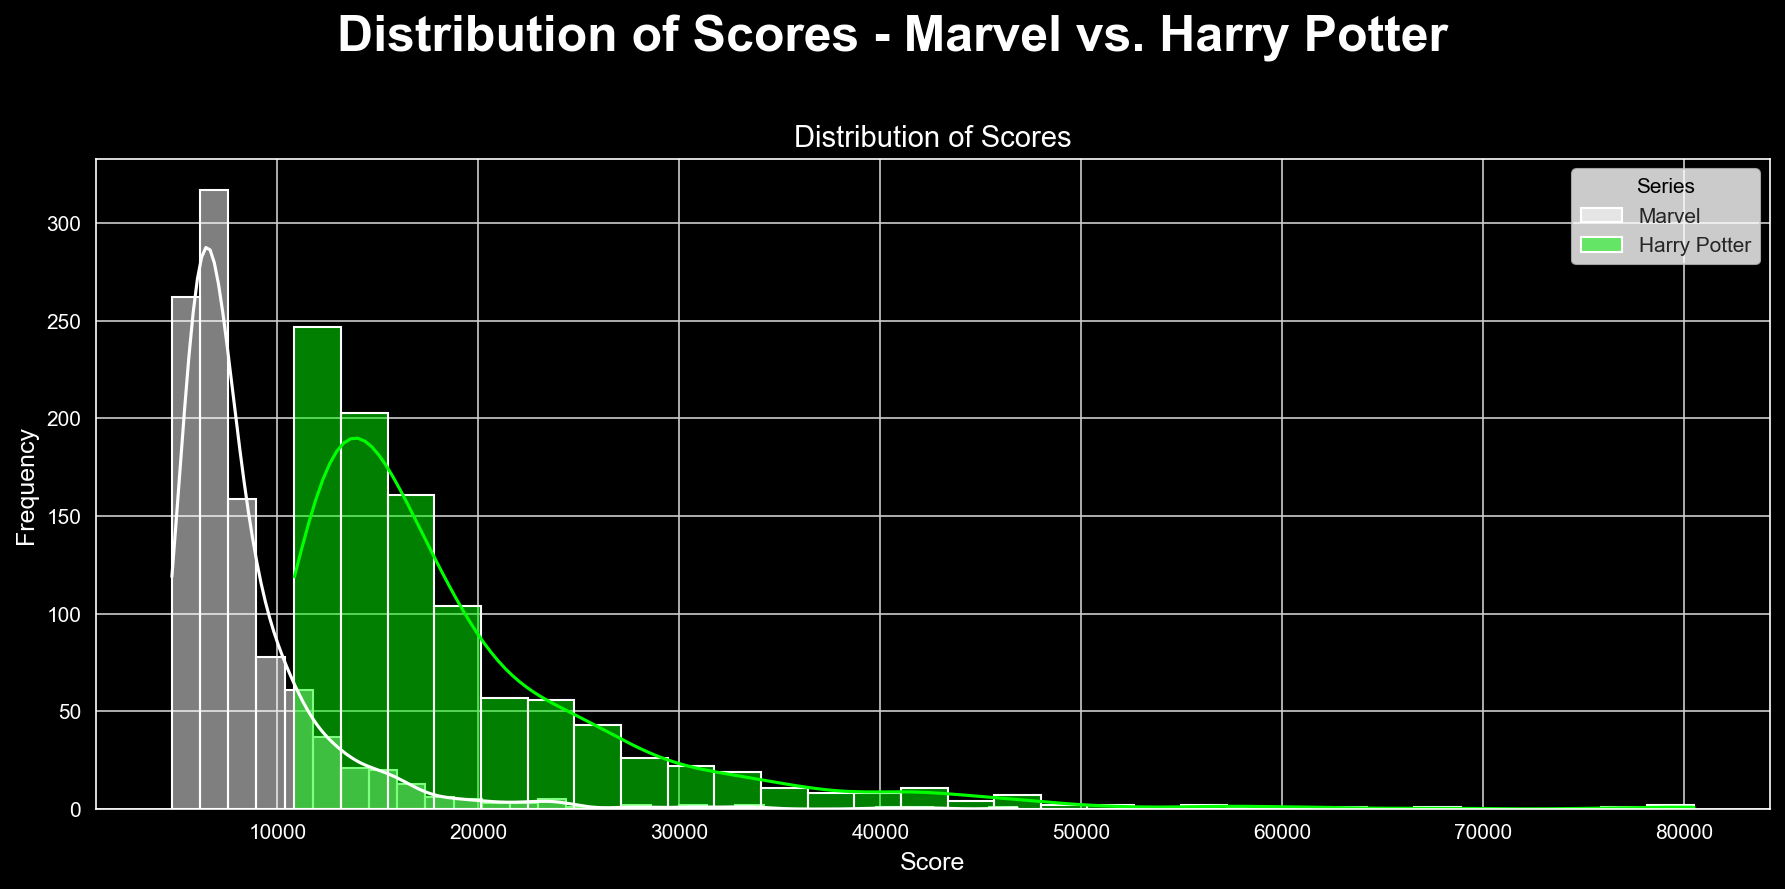

In [207]:

sns.set_style("whitegrid")

# Create a new figure and axes for the Distribution of Scores
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), dpi=150, facecolor='black')
fig.suptitle('Distribution of Scores - Marvel vs. Harry Potter', fontsize=24, fontweight='bold', color='white')

# Distribution of Scores for Marvel
sns.histplot(data=marvel, x='score', bins=30, kde=True, color='white', label='Marvel', ax=axes)
sns.histplot(data=harrypotter, x='score', bins=30, kde=True, color='lime', label='Harry Potter', ax=axes)

axes.set_title('Distribution of Scores', fontsize=14, color='white')
axes.set_xlabel('Score', fontsize=12, color='white')
axes.set_ylabel('Frequency', fontsize=12, color='white')

# Add a legend
legend = axes.legend(title="Series")
legend.get_title().set_color('black')

# Set the color of ticks and tick labels to white
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

# Change background grid to black and lines to white
axes.set_facecolor('black')
for spine in axes.spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


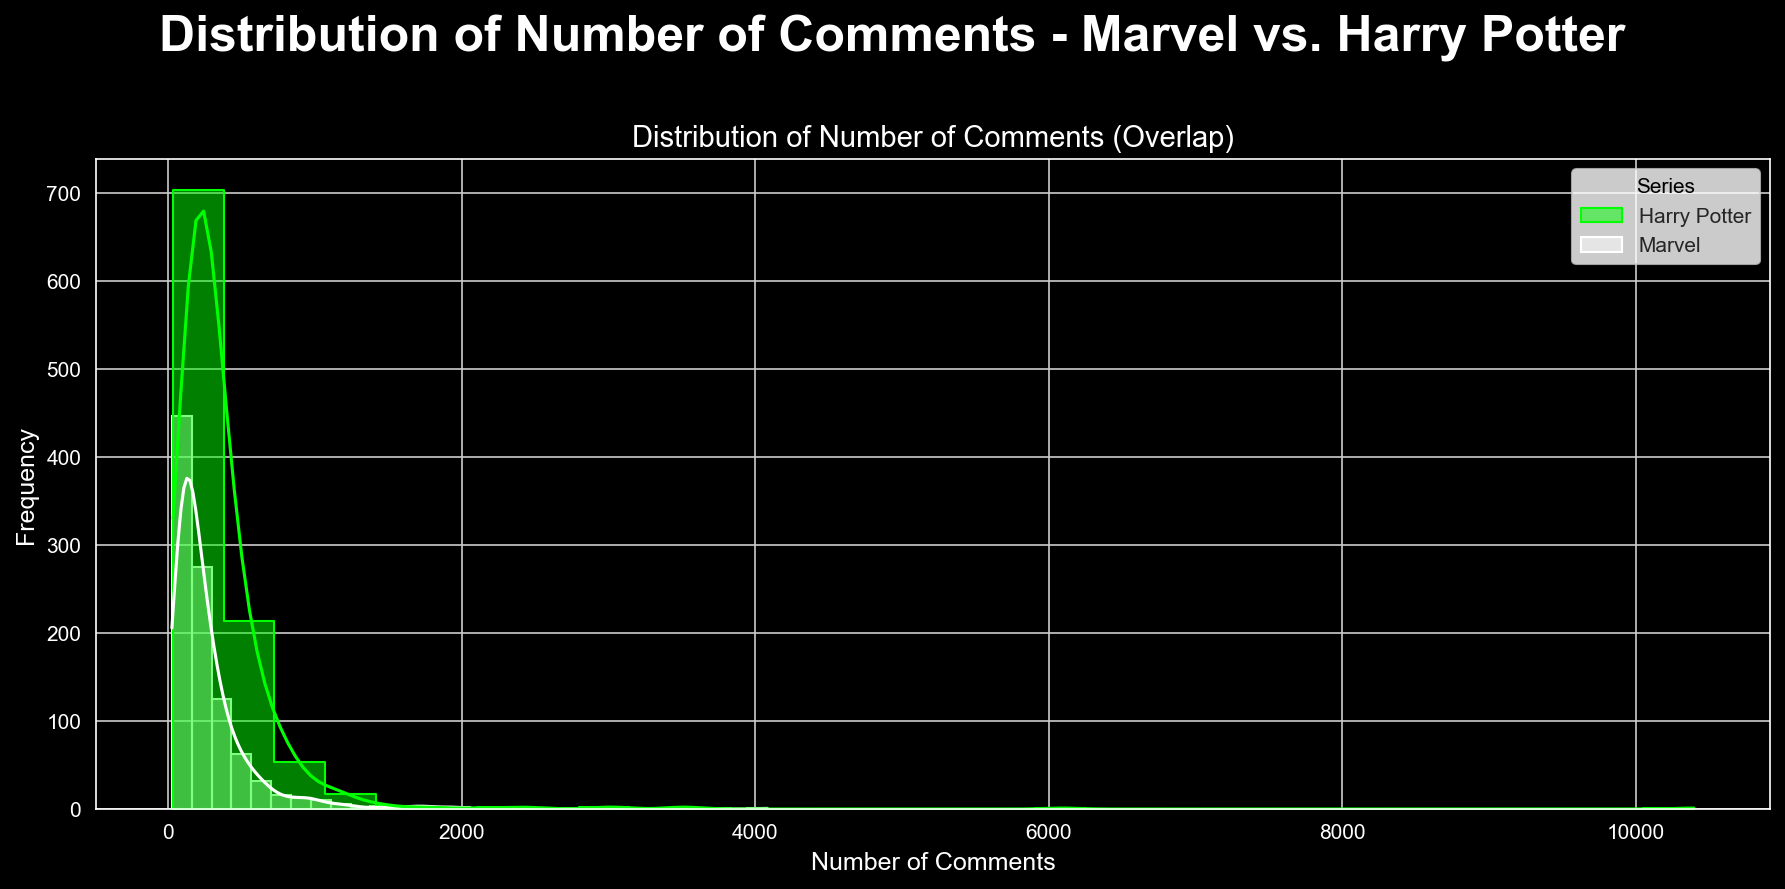

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), dpi=150, facecolor='black')
fig.suptitle('Distribution of Number of Comments - Marvel vs. Harry Potter', fontsize=24, fontweight='bold', color='white')

# Distribution of Number of Comments for Marvel
sns.histplot(data=marvel, x='num_comments', bins=30, kde=True, color='white', ax=axes, label='Marvel')
axes.set_title('Distribution of Number of Comments', fontsize=14, color='white')
axes.set_xlabel('Number of Comments', fontsize=12, color='white')
axes.set_ylabel('Frequency', fontsize=12, color='white')

# Set the color of ticks and tick labels to white
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')

# Distribution of Number of Comments for Harry Potter (overlap)
sns.histplot(data=harrypotter, x='num_comments', bins=30, kde=True, color='lime', ax=axes, label='Harry Potter', element="step")
axes.set_title('Distribution of Number of Comments (Overlap)', fontsize=14, color='white')
axes.set_xlabel('Number of Comments', fontsize=12, color='white')
axes.set_ylabel('Frequency', fontsize=12, color='white')

# Add a legend
legend = axes.legend(title="Series")
legend.get_title().set_color('black') 

# Change background grid to black and lines to white
axes.set_facecolor('black')
for spine in axes.spines.values():
    spine.set_edgecolor('white')

# Automatically adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [202]:
harrypotter['created_utc'] = pd.to_datetime(harrypotter['created_utc'], unit='s')
marvel['created_utc'] = pd.to_datetime(marvel['created_utc'], unit='s')

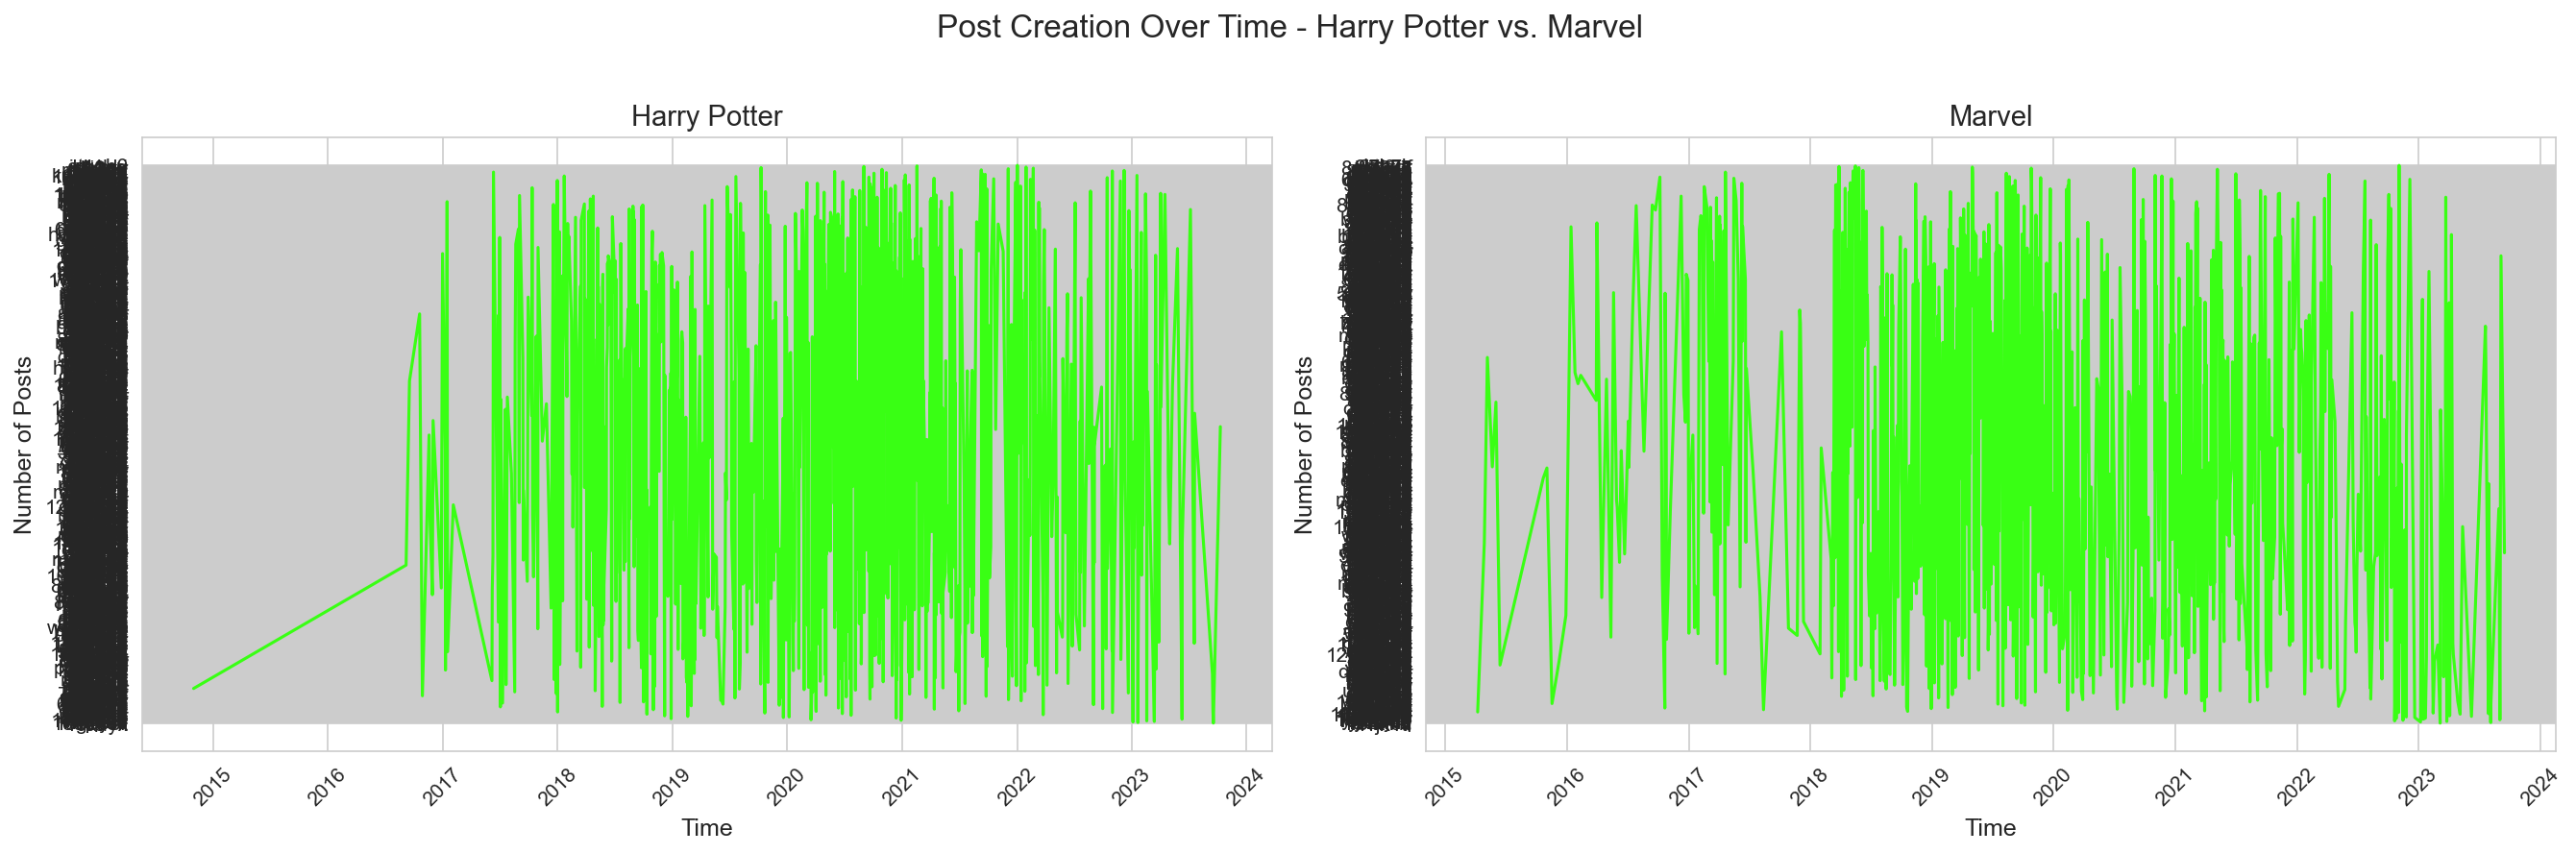

In [205]:
# Set the style
sns.set_style("whitegrid")

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=150, facecolor='white')
fig.suptitle('Post Creation Over Time - Harry Potter vs. Marvel', fontsize=16)

# Line plot for Harry Potter
sns.lineplot(data=harrypotter, x='created_utc', y='id', ax=axes[0])
axes[0].set_title('Harry Potter', fontsize=14)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Number of Posts', fontsize=12)

# Line plot for Marvel
sns.lineplot(data=marvel, x='created_utc', y='id', ax=axes[1])
axes[1].set_title('Marvel', fontsize=14)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Number of Posts', fontsize=12)

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Automatically adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()